<h1><center> Application of K-Means Algorithm </center></h1>

In [3]:
#### import all libraries required.
import pandas as pd 
import numpy as np 
from sklearn import datasets
from matplotlib import pyplot as plt 
import seaborn as sns 

sns.set_style()

In [53]:
plt.style.use("ggplot")

### Generate synthetic dataset from sklearn. 

- Randomly 250 dataset generated. 
- Assume these dataset are not labeled dataset. 

In [54]:
X, classes = datasets.make_blobs(n_samples=600,centers=4,random_state=123)

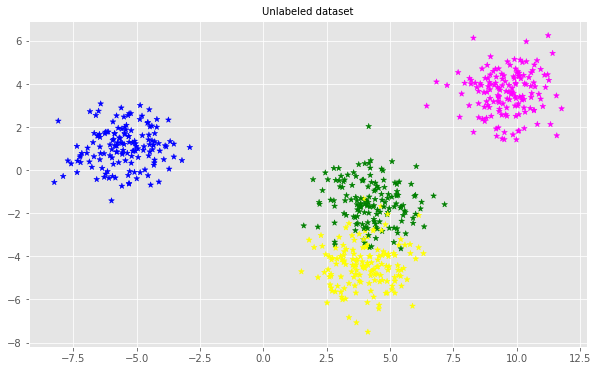

In [55]:
color = np.array(["yellow","blue","green","magenta"])
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],marker="*",color=color[classes])
plt.title("Unlabeled dataset",fontsize="medium")
plt.show()

In [56]:
#### check the shape of the dataset. 
X.shape 

(600, 2)

### Implementation of K-means algorithm 

In [61]:
### develop a k-means algorithm 
from sklearn.cluster import KMeans,MiniBatchKMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
### access the k-mean center mean. 
kmeans.cluster_centers_,np.unique(kmeans.labels_)

(array([[ 4.29112594, -1.45285212],
        [-5.50041392,  1.06984405],
        [ 9.61270346,  3.60670234],
        [ 3.99375771, -4.49467577]]),
 array([0, 1, 2, 3], dtype=int32))

#### Evaluate the best k clusters 

In [67]:
from sklearn.metrics import silhouette_score

silhoutte_avg = []
for k in range(2,100):
    kmeans = KMeans(n_clusters=k).fit(X)
    silhoutte_avg.append(silhouette_score(X,kmeans.labels_))

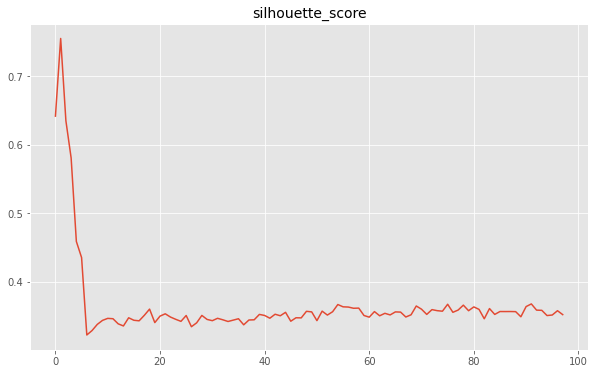

In [70]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(silhoutte_avg)),silhoutte_avg)
plt.title("silhouette_score",fontsize=14)
plt.show()

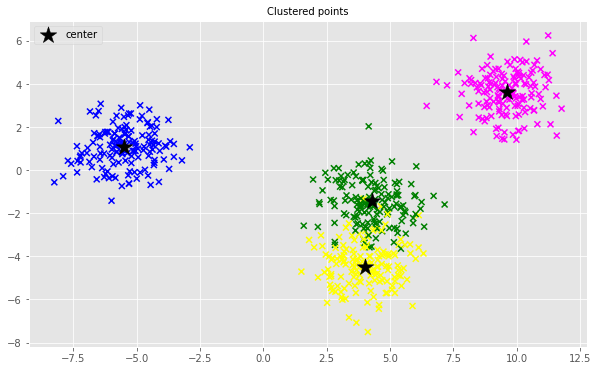

In [65]:
########## Visualize the 
fig , ax = plt.subplots(figsize=(10,6))
##########
colors = ["blue","green","yellow"]
ax.scatter(X[:,0],X[:,1],marker="x",color=color[classes])
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="*",s=300,color="black",label="center")
ax.set_title("Clustered points",fontsize="medium")
ax.legend(loc="best")
plt.show()